<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/PICD_Perceptr%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa Intensivo en Ciencia de Datos de los Fundamentos al Deep Learning** 💻

---

## **Módulo 3**: *Redes Neuronales Artificiales* 🧠🤖

---

<table>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Dra. Nidiyare Hevia Montiel: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a>
      <br>
      <br>
      Dra. Blanca Vázquez Gómez: <a href= "mailto:blanca.vazquez@iimas.unam.mx">blanca.vazquez@iimas.unam.mx</a>
      <br>
      <br>
      Ing. Gabriel Carcedo Rodríguez: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a> </h4>
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://arbioiimas.github.io/ArBio"><img src="https://arbioiimas.github.io/ArBio/images/logo_arbio.png" alt="Artificial Intelligence in Biomedicine Group (ArBio)" style="width:80%; height:auto;"></a>
    </td>
  </tr>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Programa impartido por el <a href="https://www.iimas.unam.mx/">Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas, IIMAS, UNAM</a>.
      <br>
      <br>
      Para mayor información visite el <a href="https://www.iimas.unam.mx/educacioncontinua/curso_deep_learning.html">sitio oficial</a>.
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://www.iimas.unam.mx/educacioncontinua/"><img src="https://www.iimas.unam.mx/educacioncontinua/images/logo.svg" alt="Educación Continua, IIMAS, UNAM" style="width:100%; height:auto;"></a></h4>
    </td>
  </tr>
</table>

---
---

# Paquetes y Librerías 📚

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Funciones de activación 📈

In [2]:
def step(n):
    return np.where(n >= 0, 1, 0)

def stepSym(n):
    return np.where(n < 0, -1, 1)

def linear(n):
    return np.array(n)

def linearSat(n):
    return np.clip(n, 0, 1)

def linearSatSym(n):
    return np.clip(n, -1, 1)

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def tanh(n):
    return np.tanh(n)

def relu(n):
    return np.maximum(0, n)

def leakyRelu(n):
    return np.where(n < 0, 0.01 * n, n)

def elu(n):
    return np.where(n < 0, 0.01 * (np.exp(n) - 1), n)

def softmax(n):
    return np.exp(n) / np.sum(np.exp(n))

def softPlus(n):
    return np.log(1 + np.exp(n))

def logSigmoid(n):
    return np.log(1 / (1 + np.exp(-n)))

def hyperbTanhSigmoid(n):
    return np.tanh(logSigmoid(n))


---
# **Perceptrón simple con múltiples entradas y múltiples salidas**

## R entradas, S salidas
---

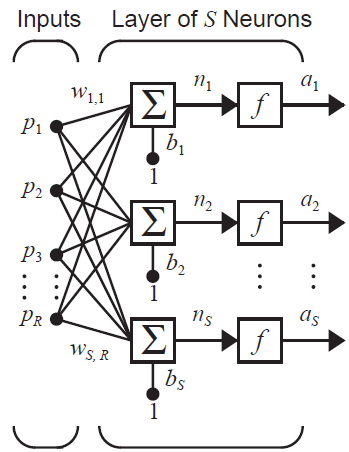

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [3]:
# Número de registros
samples = 1000

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100

# Etiquetas
aceptado = ((promedios > 7.5) & (calif_examen > 7)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1
beca = ((promedios > 8) & (calif_examen > 8)).astype(int)       # regla: si promedio > 8.5 y examen > 80 → beca=1

for idx in range(samples):
  print(f"Promedio: {promedios[idx]:.2f}, Examen: {calif_examen[idx]:.2f} → Aceptado: {aceptado[idx]}, Beca: {beca[idx]}")

Promedio: 8.86, Examen: 6.74 → Aceptado: 0, Beca: 0
Promedio: 5.10, Examen: 9.04 → Aceptado: 0, Beca: 0
Promedio: 8.17, Examen: 7.30 → Aceptado: 1, Beca: 0
Promedio: 8.74, Examen: 8.13 → Aceptado: 1, Beca: 1
Promedio: 7.49, Examen: 6.02 → Aceptado: 0, Beca: 0
Promedio: 6.12, Examen: 5.47 → Aceptado: 0, Beca: 0
Promedio: 5.99, Examen: 9.88 → Aceptado: 0, Beca: 0
Promedio: 8.80, Examen: 6.84 → Aceptado: 0, Beca: 0
Promedio: 5.85, Examen: 7.88 → Aceptado: 0, Beca: 0
Promedio: 5.44, Examen: 6.23 → Aceptado: 0, Beca: 0
Promedio: 8.43, Examen: 9.96 → Aceptado: 1, Beca: 1
Promedio: 9.77, Examen: 7.83 → Aceptado: 1, Beca: 0
Promedio: 5.02, Examen: 7.58 → Aceptado: 0, Beca: 0
Promedio: 7.56, Examen: 9.41 → Aceptado: 1, Beca: 0
Promedio: 9.06, Examen: 5.06 → Aceptado: 0, Beca: 0
Promedio: 8.06, Examen: 8.65 → Aceptado: 1, Beca: 1
Promedio: 8.61, Examen: 6.59 → Aceptado: 0, Beca: 0
Promedio: 6.46, Examen: 8.25 → Aceptado: 0, Beca: 0
Promedio: 9.59, Examen: 9.13 → Aceptado: 1, Beca: 1
Promedio: 8.

# Visualizar el Dataset

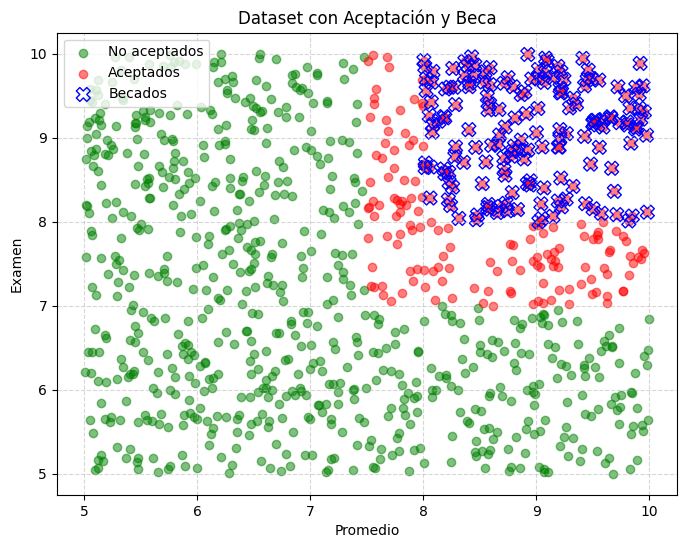

In [4]:
# Visualización
plt.figure(figsize=(8, 6))
colors = ['r', 'g']

# Aceptados
plt.scatter(promedios[aceptado == 0], calif_examen[aceptado == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(promedios[aceptado == 1], calif_examen[aceptado == 1], c=colors[0], label='Aceptados', alpha=0.5)

# Becados
beca_indices = np.where(beca == 1)[0]
plt.scatter(promedios[beca_indices], calif_examen[beca_indices], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')

plt.legend()

plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Dataset con Aceptación y Beca")
plt.grid(ls='--', alpha=0.5)
plt.show()

# Inicialización de parámetros

In [5]:
# Dataset de múltiples entradas
p = np.column_stack((promedios, calif_examen))  #  (n, 2)
a = np.column_stack((aceptado, beca))   #  (n, 2)

np.random.seed(1)
W = np.random.rand(2, 2)  # (2 entradas, 2 salidas)
b = np.random.rand(1, 2)  # (1, 2)
epochs = 500
lr = 0.01

print("Pesos iniciales:", W)
print("Bias inicial:", b)

Pesos iniciales: [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
Bias inicial: [[0.14675589 0.09233859]]


### Función sumatoria

In [6]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # Producto punto

# Entrenamiento

In [7]:
losses, accs, weights, biases = [], [], [], []

for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i].reshape(1, 2) # (1, 2)
        ai = a[i].reshape(1, 2) # (1, 2)

        # Paso hacia adelante
        n = SumMult(pi, W, b) # (1, 2)
        a_hat = step(n) # salida predicha (1, 2)

        # Cálculo del error
        error = ai - a_hat # (1, 2)

        # Actualización de pesos
        W += lr * np.dot(pi.T, error) # (2, 2)
        b += lr * error # (1, 2)

    # Métricas por época
    n_all = SumMult(p, W, b)
    predictions = step(n_all)
    acc = np.mean(predictions == a)
    loss = np.mean((predictions - a) ** 2)

    losses.append(loss)
    accs.append(acc)
    weights.append(W.tolist())
    biases.append(b.tolist())

    print(f"Epoch {epoch+1}/{epochs} - Acc: {acc:.2f} - Loss: {loss:.2f}")

Epoch 1/500 - Acc: 0.57 - Loss: 0.43
Epoch 2/500 - Acc: 0.64 - Loss: 0.36
Epoch 3/500 - Acc: 0.39 - Loss: 0.61
Epoch 4/500 - Acc: 0.66 - Loss: 0.34
Epoch 5/500 - Acc: 0.72 - Loss: 0.28
Epoch 6/500 - Acc: 0.44 - Loss: 0.56
Epoch 7/500 - Acc: 0.49 - Loss: 0.51
Epoch 8/500 - Acc: 0.72 - Loss: 0.28
Epoch 9/500 - Acc: 0.89 - Loss: 0.11
Epoch 10/500 - Acc: 0.80 - Loss: 0.20
Epoch 11/500 - Acc: 0.71 - Loss: 0.29
Epoch 12/500 - Acc: 0.82 - Loss: 0.18
Epoch 13/500 - Acc: 0.75 - Loss: 0.25
Epoch 14/500 - Acc: 0.81 - Loss: 0.19
Epoch 15/500 - Acc: 0.78 - Loss: 0.22
Epoch 16/500 - Acc: 0.64 - Loss: 0.36
Epoch 17/500 - Acc: 0.79 - Loss: 0.21
Epoch 18/500 - Acc: 0.75 - Loss: 0.25
Epoch 19/500 - Acc: 0.84 - Loss: 0.16
Epoch 20/500 - Acc: 0.88 - Loss: 0.12
Epoch 21/500 - Acc: 0.90 - Loss: 0.10
Epoch 22/500 - Acc: 0.87 - Loss: 0.13
Epoch 23/500 - Acc: 0.82 - Loss: 0.18
Epoch 24/500 - Acc: 0.85 - Loss: 0.15
Epoch 25/500 - Acc: 0.88 - Loss: 0.12
Epoch 26/500 - Acc: 0.73 - Loss: 0.27
Epoch 27/500 - Acc: 0

# Visualizar convergencias

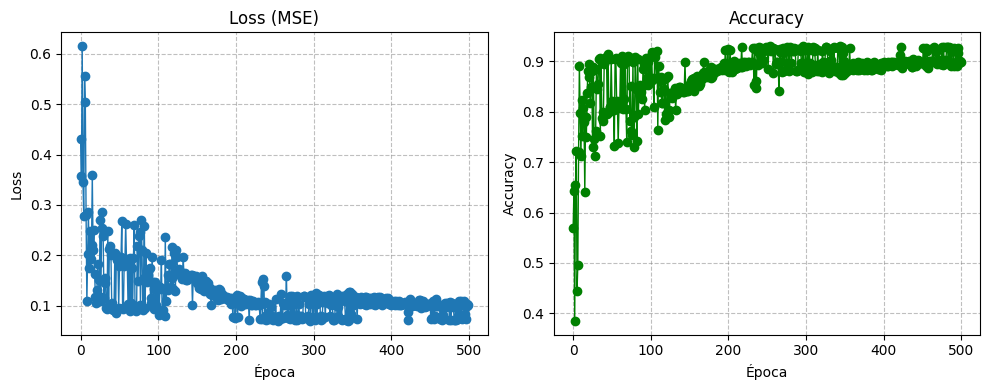

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(losses, marker="o", lw=1)
plt.title("Loss (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.subplot(1,2,2)
plt.plot(accs, marker="o", color="g", lw=1)
plt.title("Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

# Ver el Perceptrón 🔎

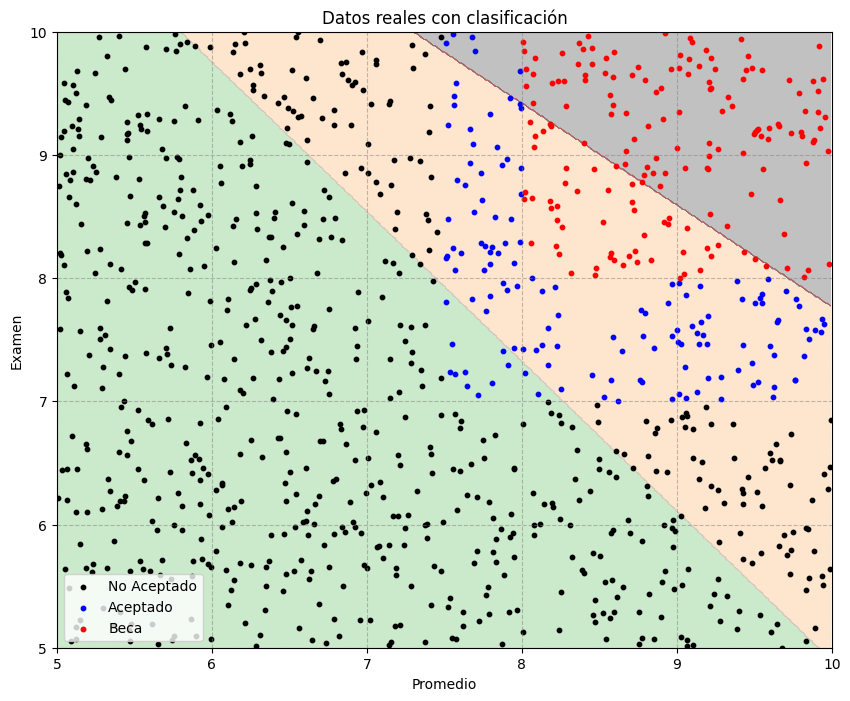

In [9]:
# Visualización de fronteras
x_min, x_max = 5, 10
y_min, y_max = 5, 10
h = 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Paso por el perceptrón entrenado
n_grid = SumMult(grid, W, b)
a_grid = step(n_grid)   # valores en (0,1)

# Umbralizar
aceptado_map = a_grid[:, 0] > 0.5
beca_map = a_grid[:, 1] > 0.5

# Codificación de colores
colors = np.zeros_like(aceptado_map, dtype=int)
colors += aceptado_map.astype(int)
colors += 2 * beca_map.astype(int)

# Desplegando figura
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, colors.reshape(xx.shape), alpha=0.4, cmap='Accent')

# Filtrar por clase
mask_none   = (aceptado == 0) & (beca == 0)
mask_acept  = (aceptado == 1) & (beca == 0)
mask_beca   = (aceptado == 1) & (beca == 1)

# Graficar cada clase con scatter
plt.scatter(promedios[mask_none], calif_examen[mask_none], c="k", s=10, label="No Aceptado")
plt.scatter(promedios[mask_acept], calif_examen[mask_acept], c="b", s=10, label="Aceptado")
plt.scatter(promedios[mask_beca], calif_examen[mask_beca], c="r", s=10, label="Beca")

plt.legend(loc = 'lower left')
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Datos reales con clasificación")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(ls='--', color='grey', alpha=0.5)
plt.show()


# **Ejercicio 1**: Probar nuevo registro

>#### a. Crear un nuevo registro
>#### b. Emplear el Perceptrón entrenado para hacer una predicción de la aceptación y obtención de beca

# **Ejercicio 2**: Integrar las actividades extracurriculares para mejorar las predicciones

>#### a. Asignar un nuevo criterio para la generación de las etiquetas
>#### b. Reentrenar el perceptrón


In [ ]:
# Codifica aquí

# **Perceptrón Multicapa (MLP)**

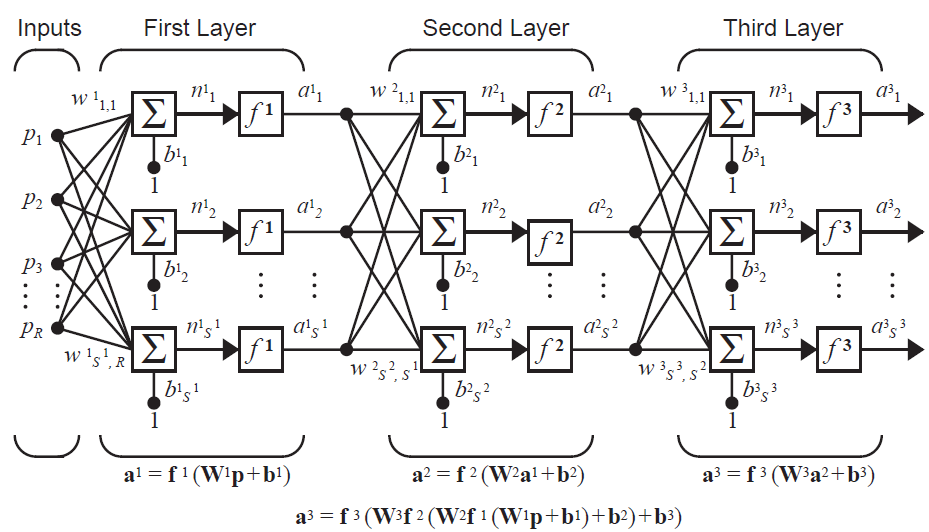

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el Dataset

In [10]:
# Número de registros
samples = 2000

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100
extracurriculares = np.random.randint(0, 10, samples)  # actividades extracurriculares de 0 a 10

# Etiquetas
aceptado = ((promedios > 7.5) & (calif_examen > 7)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1
beca = ((promedios > 8) & (calif_examen > 8) & (extracurriculares > 5)).astype(int)  # regla: si promedio > 8 y examen > 80 y actividades extracurriculares > 5 → beca=1

for idx in range(samples):
  print(f"Promedio: {promedios[idx]:.2f}, Examen: {calif_examen[idx]:.2f}, Extracurriculares: {extracurriculares[idx]}, Aceptado: {aceptado[idx]}, Beca: {beca[idx]}")

Promedio: 8.86, Examen: 7.95, Extracurriculares: 7, Aceptado: 1, Beca: 0
Promedio: 5.10, Examen: 8.87, Extracurriculares: 9, Aceptado: 0, Beca: 0
Promedio: 8.17, Examen: 7.79, Extracurriculares: 4, Aceptado: 1, Beca: 0
Promedio: 8.74, Examen: 5.93, Extracurriculares: 3, Aceptado: 0, Beca: 0
Promedio: 7.49, Examen: 6.84, Extracurriculares: 4, Aceptado: 0, Beca: 0
Promedio: 6.12, Examen: 8.45, Extracurriculares: 6, Aceptado: 0, Beca: 0
Promedio: 5.99, Examen: 8.87, Extracurriculares: 6, Aceptado: 0, Beca: 0
Promedio: 8.80, Examen: 6.75, Extracurriculares: 6, Aceptado: 0, Beca: 0
Promedio: 5.85, Examen: 5.85, Extracurriculares: 6, Aceptado: 0, Beca: 0
Promedio: 5.44, Examen: 5.69, Extracurriculares: 8, Aceptado: 0, Beca: 0
Promedio: 8.43, Examen: 8.32, Extracurriculares: 1, Aceptado: 1, Beca: 0
Promedio: 9.77, Examen: 8.86, Extracurriculares: 4, Aceptado: 1, Beca: 0
Promedio: 5.02, Examen: 9.98, Extracurriculares: 8, Aceptado: 0, Beca: 0
Promedio: 7.56, Examen: 8.61, Extracurriculares: 7,

# Visualizar el Dataset

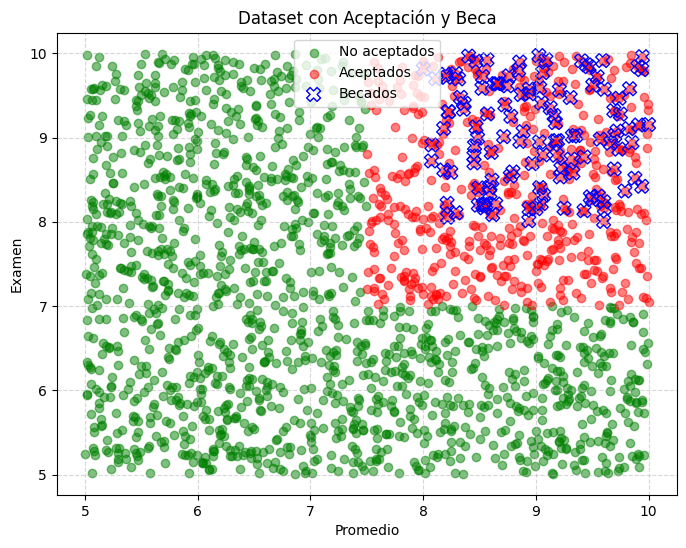

In [11]:
# Visualización
plt.figure(figsize=(8, 6))
colors = ['r', 'g']

# Aceptados
plt.scatter(promedios[aceptado == 0], calif_examen[aceptado == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(promedios[aceptado == 1], calif_examen[aceptado == 1], c=colors[0], label='Aceptados', alpha=0.5)

# Becados
beca_indices = np.where(beca == 1)[0]
plt.scatter(promedios[beca_indices], calif_examen[beca_indices], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')

plt.legend()

plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Dataset con Aceptación y Beca")
plt.grid(ls='--', alpha=0.5)
plt.show()

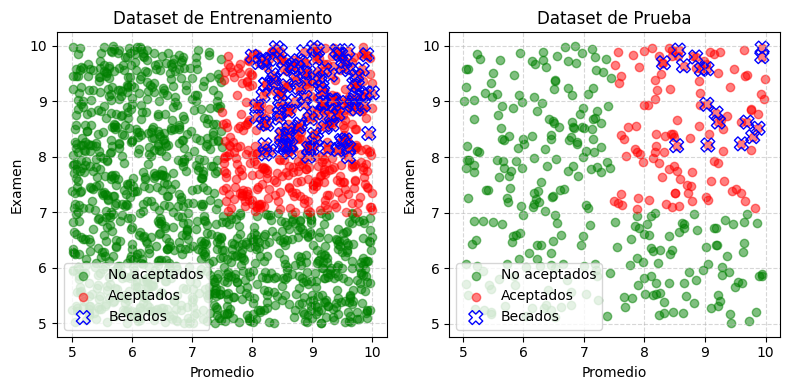

In [12]:
from sklearn.model_selection import train_test_split

# Dataset
P = np.column_stack((promedios, calif_examen, extracurriculares))  # (n, 3)
A = np.column_stack((aceptado, beca))   #  (n, 2)

P_train, P_test, A_train, A_test = train_test_split(P, A, test_size=0.2, random_state=1)

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(P_train[:, 0][A_train[:, 0] == 0], P_train[:, 1][A_train[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_train[:, 0][A_train[:, 0] == 1], P_train[:, 1][A_train[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_train[:, 0][A_train[:, 1] == 1], P_train[:, 1][A_train[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Entrenamiento")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(1,2,2)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Inicialización de parámetros

In [13]:
# Hiperparámetros
np.random.seed(1)
input_size = 3
hidden_size = 4
output_size = 2

W1 = np.random.rand(input_size, hidden_size)
b1 = np.random.rand(1, hidden_size)
W2 = np.random.rand(hidden_size, output_size)
b2 = np.random.rand(1, output_size)

lr = 0.1
epochs = 10000

print("Pesos y Biases iniciales:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

Pesos y Biases iniciales:
W1: [[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]]
b1: [[0.20445225 0.87811744 0.02738759 0.67046751]]
W2: [[0.4173048  0.55868983]
 [0.14038694 0.19810149]
 [0.80074457 0.96826158]
 [0.31342418 0.69232262]]
b2: [[0.87638915 0.89460666]]


### Función sumatoria

In [14]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # Producto punto

### Función derivada para Propagación hacia atrás

In [15]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

def relu_derivative(n):
    return (n > 0).astype(float)

def tanh_derivative(n):
    return 1 - np.tanh(n)**2

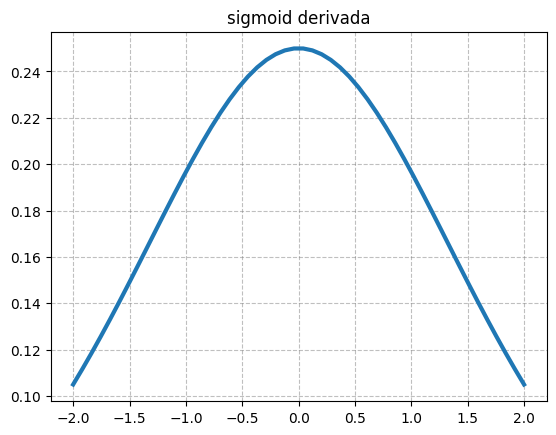

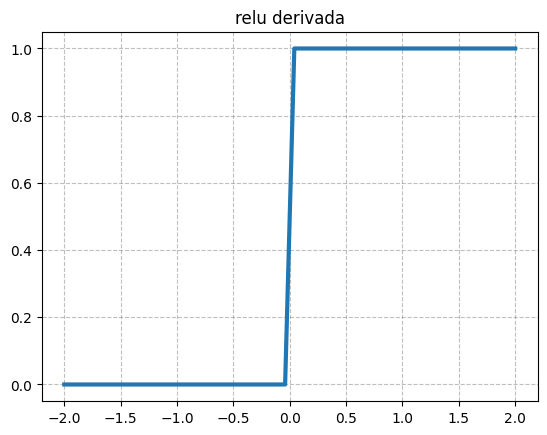

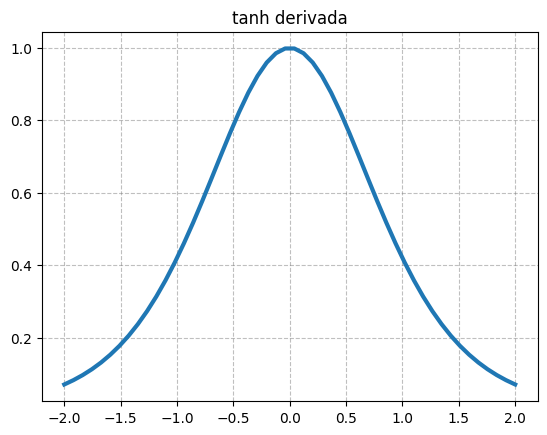

In [16]:
funciones_derivadas = {
    'sigmoid derivada': sigmoid_derivative,
    'relu derivada': relu_derivative,
    'tanh derivada': tanh_derivative
}

x = np.linspace(-2,2)

for k,v in funciones_derivadas.items():
    plt.plot(x, v(x), lw=3)
    plt.title(k)
    plt.grid(ls='--', c='gray', alpha=0.5)
    plt.show()

# Entrenamiento

In [17]:
losses, accs = [], []

for epoch in range(epochs):
    # Forward
    n1 = SumMult(P_train, W1, b1)  # (n, 4)
    a1 = relu(n1)          # (n, 4)
    n2 = SumMult(a1, W2, b2)  # (n, 2)
    a2 = sigmoid(n2)       # (n, 2)

    # Loss (MSE)
    loss = np.mean((A_train - a2)**2)
    losses.append(loss)

    # Backpropagation
    dn2 = (a2 - A_train) * sigmoid_derivative(n2)  # (n, 2)
    dW2 = np.dot(a1.T, dn2) / samples
    db2 = np.sum(dn2, axis=0, keepdims=True) / samples

    dn1 = np.dot(dn2, W2.T) * relu_derivative(n1)  # (n, 4)
    dW1 = np.dot(P_train.T, dn1) / samples
    db1 = np.sum(dn1, axis=0, keepdims=True) / samples

    # Actualización
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    preds = (a2 > 0.5).astype(int)
    acc = np.mean(preds == A_train)
    print(f"Epoch {epoch}: Loss={loss:.4f}, Acc={acc:.4f}")

    accs.append(acc)

    # Factor de parada
    if acc == 1:
        break

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 5000: Loss=0.1001, Acc=0.8509
Epoch 5001: Loss=0.0903, Acc=0.8903
Epoch 5002: Loss=0.1001, Acc=0.8509
Epoch 5003: Loss=0.0903, Acc=0.8903
Epoch 5004: Loss=0.1001, Acc=0.8509
Epoch 5005: Loss=0.0903, Acc=0.8903
Epoch 5006: Loss=0.1001, Acc=0.8512
Epoch 5007: Loss=0.0903, Acc=0.8903
Epoch 5008: Loss=0.1001, Acc=0.8512
Epoch 5009: Loss=0.0903, Acc=0.8903
Epoch 5010: Loss=0.1000, Acc=0.8512
Epoch 5011: Loss=0.0903, Acc=0.8903
Epoch 5012: Loss=0.1000, Acc=0.8516
Epoch 5013: Loss=0.0902, Acc=0.8903
Epoch 5014: Loss=0.1000, Acc=0.8516
Epoch 5015: Loss=0.0902, Acc=0.8903
Epoch 5016: Loss=0.1000, Acc=0.8512
Epoch 5017: Loss=0.0902, Acc=0.8903
Epoch 5018: Loss=0.1000, Acc=0.8516
Epoch 5019: Loss=0.0902, Acc=0.8903
Epoch 5020: Loss=0.1000, Acc=0.8516
Epoch 5021: Loss=0.0902, Acc=0.8903
Epoch 5022: Loss=0.1000, Acc=0.8516
Epoch 5023: Loss=0.0902, Acc=0.8903
Epoch 5024: Loss=0.1000, Acc=0.8516
Epoch 5025: Loss=0.0902, Acc=0.89

# Visualizando convergencias

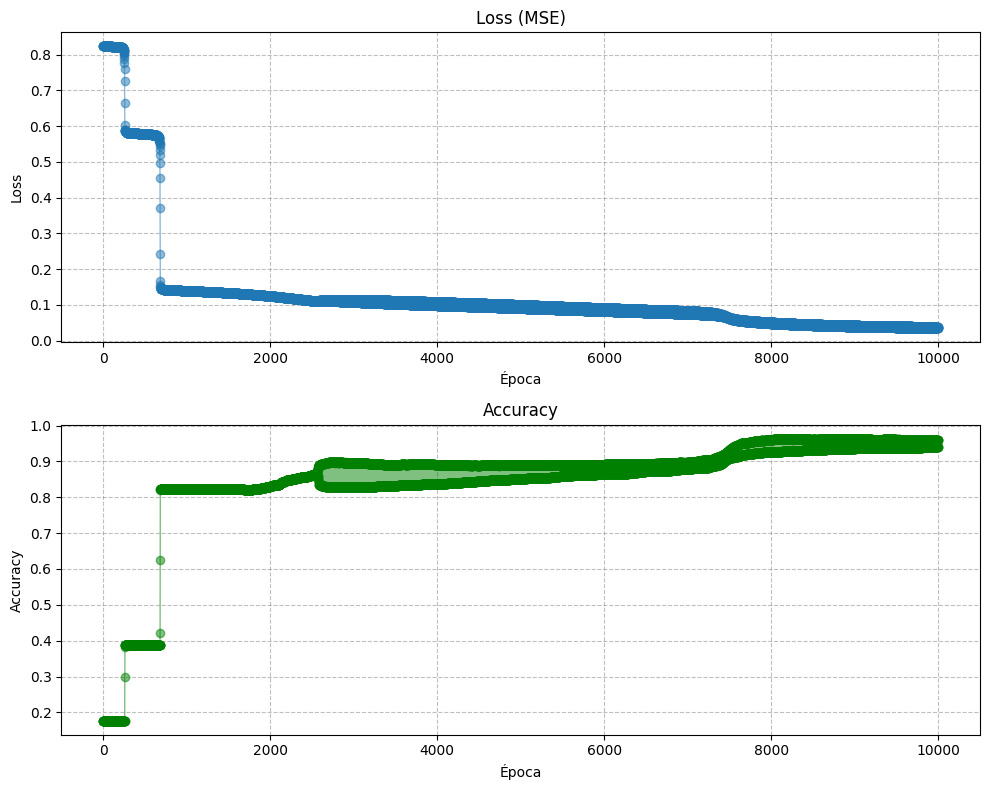

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
plt.plot(losses, marker="o", lw=1, alpha=0.5)
plt.title("Loss (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.subplot(2,1,2)
plt.plot(accs, marker="o", color="g", lw=1, alpha=0.5)
plt.title("Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

# **Test:**

In [19]:
# Test con P_test y A_test

n1 = SumMult(P_test, W1, b1)
a1 = relu(n1)
n2 = SumMult(a1, W2, b2)
a2 = sigmoid(n2)

preds = (a2 > 0.5).astype(int)
acc = np.mean(preds == A_test)
print(f"Test Accuracy: {acc:.3f}")


Test Accuracy: 0.944


# Visualizar predicciones

In [20]:
preds_correctas_aceptado = np.where(preds[:, 0] == A_test[:, 0])[0]
preds_incorrectas_aceptado = np.where(preds[:, 0] != A_test[:, 0])[0]

preds_correctas_beca = np.where(preds[:, 1] == A_test[:, 1])[0]
preds_incorrectas_beca = np.where(preds[:, 1] != A_test[:, 1])[0]

preds_correctas_ambas = np.intersect1d(preds_correctas_aceptado, preds_correctas_beca)
preds_incorrectas_ambas = np.setdiff1d(np.arange(len(P_test)), preds_correctas_ambas)


print("Predichas correctamente (Aceptación):", len(preds_correctas_aceptado))
print("Predichas incorrectamente (Aceptación):", len(preds_incorrectas_aceptado))
print("Predichas correctamente (Beca):", len(preds_correctas_beca))
print("Predichas incorrectamente (Beca):", len(preds_incorrectas_beca))
print("Predichas correctamente (Ambos):", len(preds_correctas_ambas))
print("Predichas incorrectamente (Al menos uno incorrecto):", len(preds_incorrectas_ambas))

Predichas correctamente (Aceptación): 371
Predichas incorrectamente (Aceptación): 29
Predichas correctamente (Beca): 384
Predichas incorrectamente (Beca): 16
Predichas correctamente (Ambos): 355
Predichas incorrectamente (Al menos uno incorrecto): 45


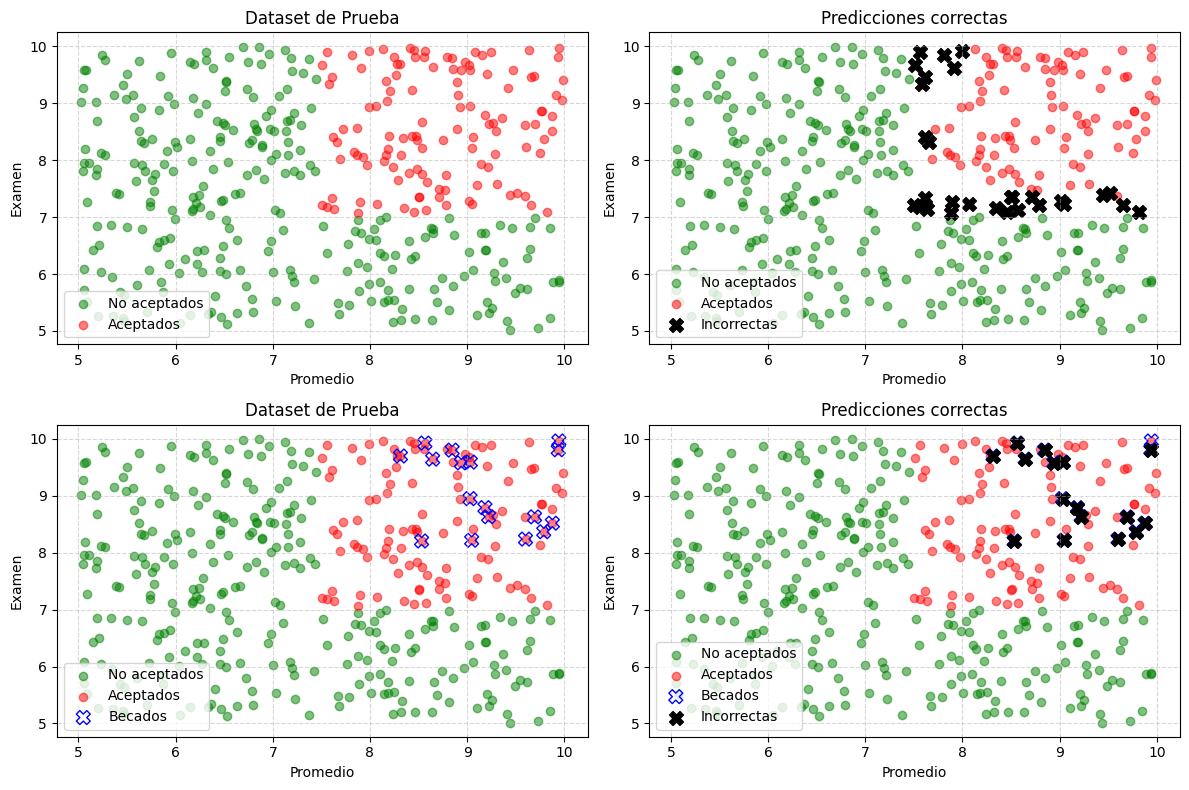

In [21]:
# Comparar las predicciones de aceptación

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(2,2,2)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][preds_incorrectas_aceptado], P_test[:, 1][preds_incorrectas_aceptado], facecolors='black', marker='X', s=100, label='Incorrectas')
plt.title("Predicciones correctas")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

# Comparar las predicciones de beca

plt.subplot(2,2,3)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.title("Dataset de Prueba")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.subplot(2,2,4)
plt.scatter(P_test[:, 0][A_test[:, 0] == 0], P_test[:, 1][A_test[:, 0] == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 0] == 1], P_test[:, 1][A_test[:, 0] == 1], c=colors[0], label='Aceptados', alpha=0.5)
plt.scatter(P_test[:, 0][A_test[:, 1] == 1], P_test[:, 1][A_test[:, 1] == 1], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')
plt.scatter(P_test[:, 0][preds_incorrectas_beca], P_test[:, 1][preds_incorrectas_beca], facecolors='black', marker='X', s=100, label='Incorrectas')
plt.title("Predicciones correctas")
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.legend(loc='lower left')
plt.grid(ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

---
# **Ejercicio Final**: Mejora tu Perceptrón Multicapa 🧠🤖
---
El objetivo de este ejercicio es **experimentar** con el perceptrón multicapa y mejorar su rendimiento en la clasificación.

## Instrucciones:

- 📌 **Arquitectura**
  - Agrega más **neuronas en la capa oculta**.
  - Prueba con **más de una capa oculta**.
  - Analiza los resultados.

- 📌 **Funciones de activación**
  - Sustituye las funciones de activación.
  - Compara cuál se ajusta mejor a los datos.

- 📌 **Hiperparámetros**
  - Cambia la **tasa de aprendizaje (lr)**.
  - Aumenta o disminuye el número de **épocas**.
  - Observa cómo afecta la **convergencia** de la pérdida.

- 📌 **Funciones de pérdida**
  - Prueba nuevas funciones de pérdida como `Cross-Entropy`.
  - Compara cómo cambia el entrenamiento.

- 📌 **Visualización**
  - Muestra las curvas de **Loss** y **Accuracy** en cada caso.
  - Compara cómo varían al modificar la arquitectura o hiperparámetros.